In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px

In [2]:
df = pd.read_table(r"Данные\DCV_042224_181056_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"

df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 300][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
df


Time       Current  Wavelength  Shutter
1365    146.416667  5.835428e-07         300      0.0
1366    146.500000  5.852758e-07         300      0.0
1367    146.583333  5.848033e-07         300      0.0
1368    146.666667  5.817328e-07         300      0.0
1369    146.750000  5.833832e-07         300      0.0
...            ...           ...         ...      ...
25978  2225.000000 -1.018047e-07         450      0.0
25979  2225.000000 -1.019814e-07         450      0.0
25980  2225.000000 -1.023321e-07         450      0.0
25981  2225.000000 -1.060419e-07         450      0.0
25982  2225.000000 -1.037049e-07         455      0.0

[24618 rows x 4 columns]

In [3]:
df.Wavelength.unique()

array([300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360,
       365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425,
       430, 435, 440, 445, 450, 455], dtype=int64)

In [4]:
len(df.Wavelength.unique())

32

In [5]:
len(df.loc[df.Wavelength == 355])

785

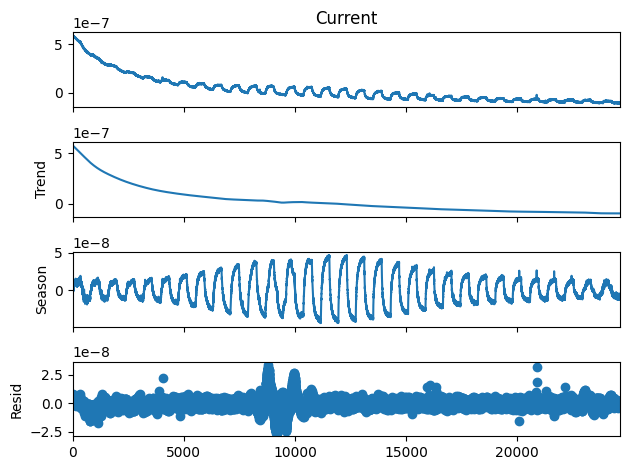

In [6]:
from statsmodels.tsa.seasonal import STL

stl = STL(df.Current.reset_index(drop=True), period=785)
res = stl.fit()
fig = res.plot()

In [7]:
px.line(res.seasonal)

In [10]:
px.line(res.trend)

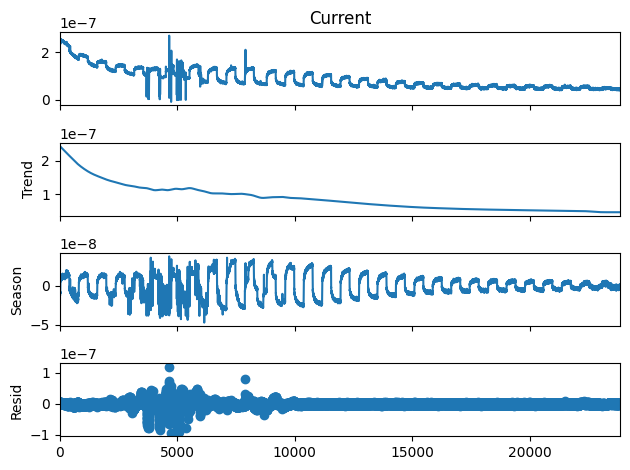

In [12]:
df = pd.read_table(r"Данные\DCV_042224_160805_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"

df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 300][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
stl = STL(df.Current.reset_index(drop=True), period=785)
res = stl.fit()
fig = res.plot()

In [14]:
px.line(res.resid)

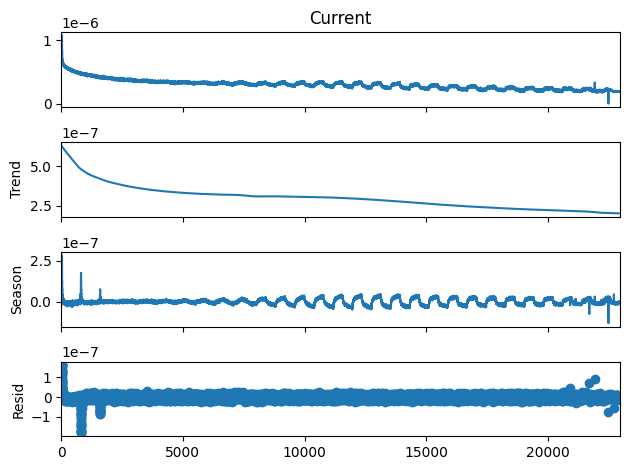

In [16]:
df = pd.read_table(r"Данные\DCV_042224_172542_.txt",  decimal=',')
format_data = "%m%d%y_%H%M%S"

df["Time"] = df.Timestamp.apply( lambda x: datetime.strptime(x, format_data))
df["Time"] = df["Time"] - df["Time"][0]
df["Time"] = df["Time"].dt.total_seconds()
for i in range(int(df.Time[df.index[-1]])):
    pattern = np.linspace(0,1,len(df[df.Time == i]))
    df.loc[df.Time == i, "Time"] += pattern
df = df.loc[df.Wavelength >= 310][["Time", "Current", "Wavelength", "Shutter"]].copy(deep=True)
stl = STL(df.Current.reset_index(drop=True), period=785)
res = stl.fit()
fig = res.plot()

In [20]:
px.line(res.seasonal)